# Stats and summaries

This is a helper notebook for custom visualisation of stats exported from wandb.

In [1]:
# import wandb

# # api = wandb.Api(api_key="your_api_key")
# wandb.login()
# artifact = api.artifact("entity/project/artifact:alias")
# artifact.download()

In [2]:
from pathlib import Path

Path("figures").mkdir(exist_ok=True)

Old plots here:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_cps_loss_weight_fit(ax: plt.Axes, wandb_file: Path, num_models: int) -> None:
    data = pd.read_csv(wandb_file, quotechar="\"").to_numpy()
    cps_loss_weight = np.array(data[:, 1], dtype=float)
    val_mse = np.array(data[:, 2], dtype=float)

    coeffs = np.polyfit(cps_loss_weight, val_mse, deg=2)
    poly = np.poly1d(coeffs)
    x_smooth = np.linspace(min(cps_loss_weight), max(cps_loss_weight), 100)
    y_smooth = poly(x_smooth)

    ax.scatter(cps_loss_weight, val_mse)
    ax.plot(x_smooth, y_smooth, c="gray", linestyle="--")
    min_lambda = x_smooth[y_smooth.argmin()]
    ax.axvline(min_lambda, c="red", label=fr"$\lambda_{{min}}$ = {min_lambda:.2f}")
    ax.set_title(rf"Validation MSE vs CPL loss weight, $\lambda$, for n={num_models} GCN models")
    ax.set_xlabel(r"CPS loss weight, $\lambda$")
    ax.set_ylabel("Validation MSE")
    ax.legend(loc="lower right")

fig, ax = plt.subplots(1, 2, figsize=(13, 4), layout="tight")
plot_cps_loss_weight_fit(ax[0], "stats/wandb_gcn_n-cps_2_500e.csv", num_models=2)
plot_cps_loss_weight_fit(ax[1], "stats/wandb_gcn_n-cps_3_500e.csv", num_models=3)

plt.savefig("figures/val_mse_vs_cps_loss_weight_gcn_ncps_num_models_3_2.png")

Random stuff follows:

num_methods=2
                     mean       std  count     score
cps_loss_weight                                     
0.00             0.036067  0.001125      2  0.037192
0.25             0.036739       NaN      1       NaN
0.50             0.036065  0.002931      2  0.038996
0.75             0.034837       NaN      1       NaN
1.00             0.033541  0.000354      2  0.033896
1.25             0.034289       NaN      1       NaN
1.50             0.034516  0.000367      2  0.034883
1.75             0.035963       NaN      1       NaN
2.00             0.036056  0.000239      2  0.036295
2.25             0.036243       NaN      1       NaN
2.50             0.034566       NaN      1       NaN
2.75              0.03446       NaN      1       NaN
3.00             0.036148       NaN      1       NaN
4.00             0.037272       NaN      1       NaN
5.00             0.037804  0.001195      2  0.038999
best mean: 1.0
best mean, incl uncertainty: 1.0


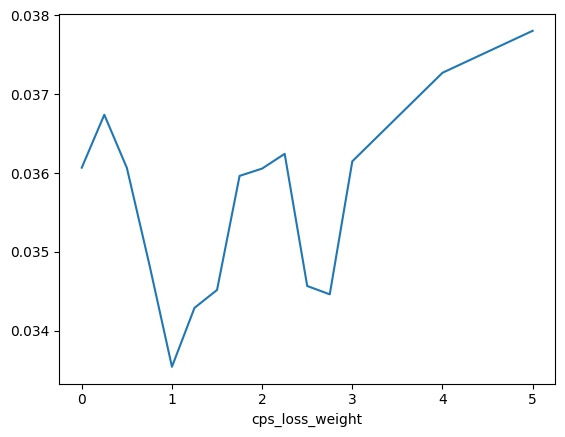

num_methods=3
                     mean       std  count     score
cps_loss_weight                                     
0.00             0.035616  0.000403      2   0.03602
0.25             0.037072       NaN      1       NaN
0.50             0.035136       NaN      1       NaN
1.00             0.035494  0.001980      2  0.037475
1.50             0.035561       NaN      1       NaN
2.00             0.035243       NaN      1       NaN
3.50             0.035652       NaN      1       NaN
4.00             0.036308       NaN      1       NaN
5.00             0.036309       NaN      1       NaN
best mean: 0.5
best mean, incl uncertainty: 0.0


<Axes: xlabel='cps_loss_weight'>

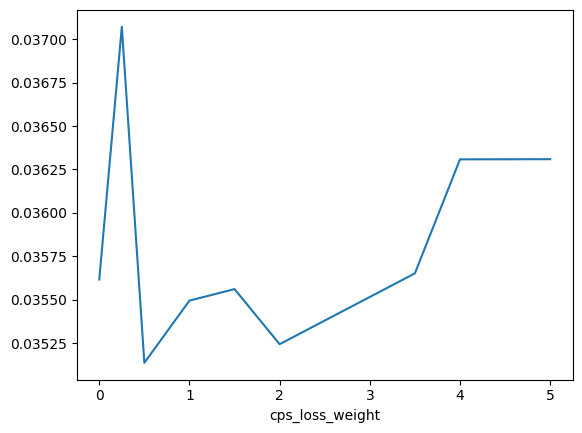

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_cps_loss_weight_fit(ax: plt.Axes, data: np.ndarray, num_models: int, **kwargs: dict) -> None:
    # data = pd.read_csv(wandb_file, quotechar="\"").to_numpy()
    cps_loss_weight = np.array(data[:, 1], dtype=float)
    val_mse = np.array(data[:, 2], dtype=float)

    coeffs = np.polyfit(cps_loss_weight, val_mse, deg=2)
    poly = np.poly1d(coeffs)
    x_smooth = np.linspace(min(cps_loss_weight), max(cps_loss_weight), 100)
    y_smooth = poly(x_smooth)

    ax.scatter(cps_loss_weight, val_mse, **kwargs)
    ax.plot(x_smooth, y_smooth, c="gray", linestyle="--")
    min_lambda = x_smooth[y_smooth.argmin()]
    ax.axvline(min_lambda, c="red", label=fr"$\lambda_{{min}}$ = {min_lambda:.2f}")
    ax.set_title(rf"Validation MSE vs CPL loss weight, $\lambda$, for n={num_models} GCN models")
    ax.set_xlabel(r"CPS loss weight, $\lambda$")
    ax.set_ylabel("Validation MSE")
    ax.legend(loc="lower right")

# fig, ax = plt.subplots(1, 2, figsize=(13, 4), layout="tight")
print("num_methods=2")
data1 = pd.read_csv("stats/wandb_gcn_n-cps_2_500e.csv", quotechar="\"").to_numpy()
df = pd.DataFrame(data1[:, 1:3], columns=["cps_loss_weight", "val_mse"])
agg = df.groupby("cps_loss_weight")["val_mse"].agg(["mean", "std", "count"])
best_hp = agg["mean"].idxmin()
agg["score"] = agg["mean"] + agg["std"]
best_hp_std = agg["score"].idxmin()
print(agg)
print(f"best mean: {best_hp}")
print(f"best mean, incl uncertainty: {best_hp_std}")
df.groupby("cps_loss_weight")["val_mse"].mean().plot()
# plot_cps_loss_weight_fit(ax[0], data1, num_models=3)
plt.show()

print("num_methods=3")
data2 = pd.read_csv("stats/wandb_gcn_n-cps_3_500e.csv", quotechar="\"").to_numpy()
df = pd.DataFrame(data2[:, 1:3], columns=["cps_loss_weight", "val_mse"])
agg = df.groupby("cps_loss_weight")["val_mse"].agg(["mean", "std", "count"])
best_hp = agg["mean"].idxmin()
agg["score"] = agg["mean"] + agg["std"]
best_hp_std = agg["score"].idxmin()
print(agg)
print(f"best mean: {best_hp}")
print(f"best mean, incl uncertainty: {best_hp_std}")
df.groupby("cps_loss_weight")["val_mse"].mean().plot()
# plot_cps_loss_weight_fit(ax[1], data2, num_models=2)

# plt.savefig("figures/val_mse_vs_cps_loss_weight_gcn_ncps_num_models_3_2.png")

(27, 4)
(31, 4)
(58, 4)
(2, 4)
[['gcn_n-cps_n2_lr0.0001_wd0.01' 0.5 0.0787439729486193 nan]
 ['gcn_n-cps_n2_lr0.0001_wd0.005' 0.5 0.0788457755531583 nan]]
outliers removed shape: (52, 4)


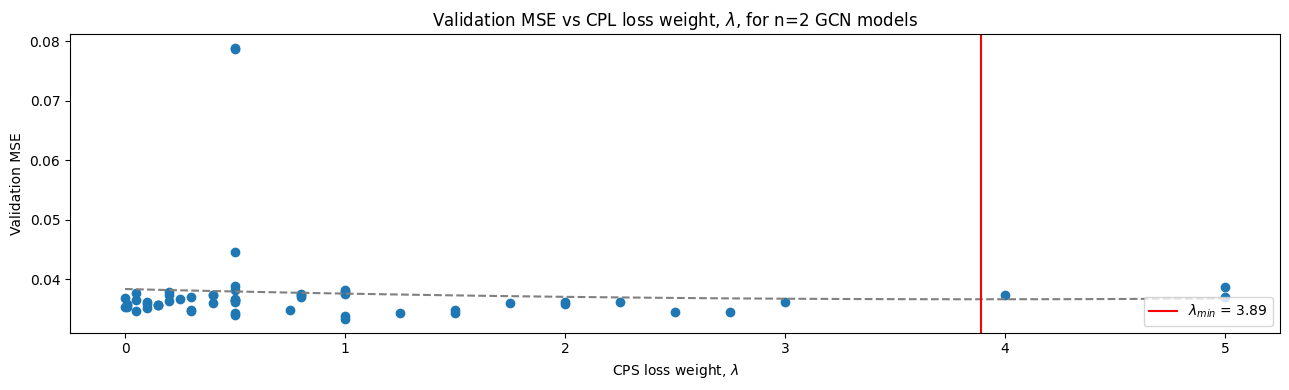

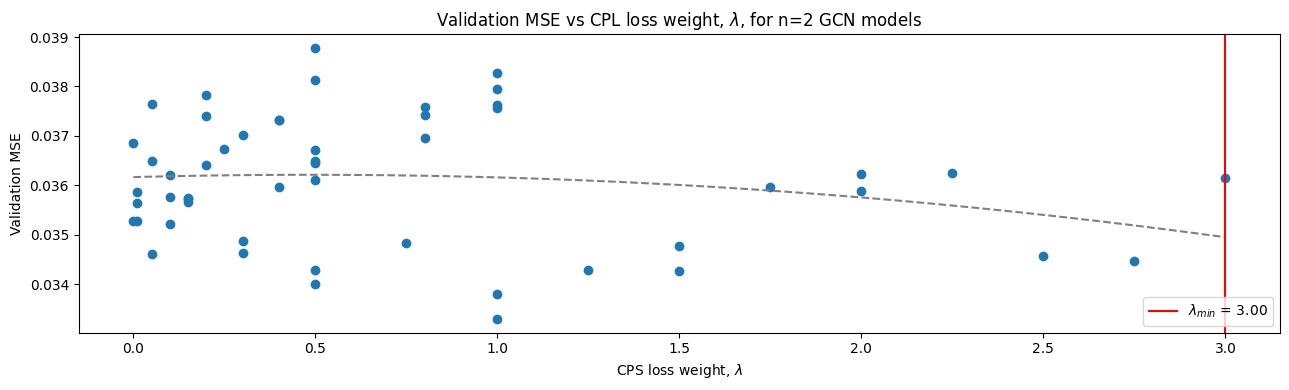

In [38]:
fig, ax = plt.subplots(figsize=(13, 4), layout="tight")
f1 = "stats/wandb_gcn_n-cps_2_500e_migle.csv"
f2 = "stats/wandb_gcn_n-cps_2_500e_smillas.csv"

data1 = pd.read_csv(f1, quotechar="\"").to_numpy()
data2 = pd.read_csv(f2, quotechar="\"").to_numpy()

print(data1.shape)
print(data2.shape)
data = np.vstack([data1, data2])
print(data.shape)
plot_cps_loss_weight_fit(ax, data, num_models=2)

print((data[data[:,2] > 0.06]).shape)
print((data[data[:,2] > 0.06]))
data_outlier_removed = data[data[:,2] < 0.04]
data_outlier_removed = data_outlier_removed[data_outlier_removed[:, 1] < 4]
print(f"outliers removed shape: {data_outlier_removed.shape}")

fig, ax = plt.subplots(figsize=(13, 4), layout="tight")
plot_cps_loss_weight_fit(ax, data_outlier_removed, num_models=2)



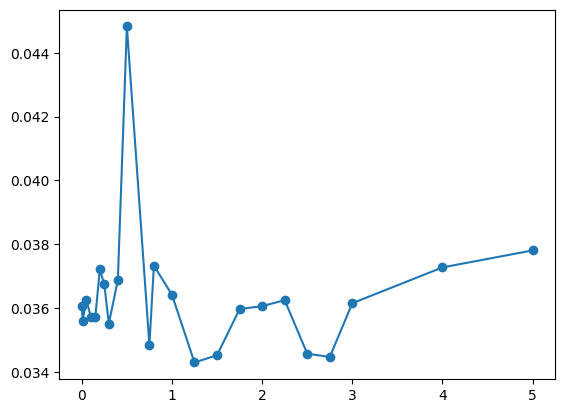

best mean: 1.25
best mean, incl uncertainty: 1.5


,mean,std,count,score
cps_loss_weight,,,,
0.00,0.036067,0.001125,2,0.037192
0.01,0.035602,0.000296,3,0.035898
0.05,0.036249,0.001528,3,0.037777
0.10,0.03573,0.000500,3,0.03623
0.15,0.035705,0.000037,3,0.035743
0.20,0.037208,0.000729,3,0.037937
0.25,0.036739,NaN,1,NaN
0.30,0.035506,0.001309,3,0.036815
0.40,0.036872,0.000786,3,0.037658


In [78]:
f1 = "stats/wandb_gcn_n-cps_2_500e_migle.csv"
f2 = "stats/wandb_gcn_n-cps_2_500e_smillas.csv"

data1 = pd.read_csv(f1, quotechar="\"").to_numpy()
data2 = pd.read_csv(f2, quotechar="\"").to_numpy()
data = np.vstack([data1, data2])
data = data[:, 1:3]
df = pd.DataFrame(data, columns=["cps_loss_weight", "val_mse"])
means = df.groupby("cps_loss_weight").mean()
# print(means.val_mse)
# print(means["cps_loss_weight"])
plt.plot(means)
plt.scatter(means.index, means["val_mse"])
plt.show()

agg = df.groupby("cps_loss_weight")["val_mse"].agg(["mean", "std", "count"])
best_lambda = agg["mean"].idxmin()
agg["score"] = agg["mean"] + agg["std"]
best_lambda_sd = agg["score"].idxmin()
print(f"best mean: {best_lambda}")
print(f"best mean, incl uncertainty: {best_lambda_sd}")
agg

In [66]:
l = 10466
ul = 94198
train = l + ul
val = 13083
test = 13084
total = l + ul + val + test
print(f"total samples: {total}")
print(f"total training: {train}")
print(f"total training, labeled: {l}")
print(f"total training, unlabeled: {ul}")
print(f"fraction training: {train/total:.2f}")
print(f"fraction labeled/train: {l/train:.2f}")
print(f"fraction labeled/total: {l/total:.2f}")
print(f"fraction unlabeled/total: {ul/total:.2f}")
print()
l12_split=(l/2) / total
l14_split=(l/4) / total
l18_split=(l/8) / total
ul12_split=l*(1-1/2)/total
ul14_split=l*(1-1/4)/total
ul18_split=l*(1-1/8)/total
l12=l12_split*total
l14=l14_split*total
l18=l18_split*total
ul12=ul12_split*total
ul14=ul14_split*total
ul18=ul18_split*total
print(f"split corresponding to 1/2 labels on labeled data: l_p'={l12_split:.2f}, u_p'={ul12_split:.2f}, l'={l12}")
print(f"split corresponding to 1/4 labels on labeled data: l_p'={l14_split:.2f}, u_p'={ul14_split:.2f}, l'={l14}")
print(f"split corresponding to 1/8 labels on labeled data: l_p'={l18_split:.2f}, u_p'={ul18_split:.2f}, l'={l18}")
print(f"l12_split*total: {l12_split*total:.2f}")
batch_size_labeled = 100
# for n in (2, 4, 8):
print(f"num batches 1/2: {l12_split*total/batch_size_labeled:.2f}")
print(f"num batches 1/4: {l14_split*total/batch_size_labeled:.2f}")
print(f"num batches 1/8: {l18_split*total/batch_size_labeled:.2f}")

batch_size_ul_12 = batch_size_labeled
batch_size_ul_14 = batch_size_labeled * 3
batch_size_ul_18 = batch_size_labeled * 7
num_l_batches_12 = l12/batch_size_labeled
num_l_batches_14 = l14/batch_size_labeled
num_l_batches_18 = l18/batch_size_labeled
labeled_to_unlabeled_ratio12 = 3
labeled_to_unlabeled_ratio14 = 7
labeled_to_unlabeled_ratio18 = 7
print(f"batch_size_labeled={batch_size_labeled}, batch_size_ul={batch_size_ul_12:.2f}, labeled_to_unlabeled_ratio: {batch_size_ul_12/batch_size_labeled}, n_l={l12} ({batch_size_labeled*num_l_batches_12}), n_ul={ul12} ({batch_size_ul_12*num_l_batches_12:.2f})")
print(f"batch_size_labeled={batch_size_labeled}, batch_size_ul={batch_size_ul_14:.2f}, labeled_to_unlabeled_ratio: {batch_size_ul_14/batch_size_labeled}, n_l={l14} ({batch_size_labeled*num_l_batches_14}), n_ul={ul14} ({batch_size_ul_14*num_l_batches_14:.2f})")
print(f"batch_size_labeled={batch_size_labeled}, batch_size_ul={batch_size_ul_18:.2f}, labeled_to_unlabeled_ratio: {batch_size_ul_18/batch_size_labeled}, n_l={l18} ({batch_size_labeled*num_l_batches_18}), n_ul={ul18} ({batch_size_ul_18*num_l_batches_18:.2f})")
print("-------------------")
print("Splits for few-label test:")
print(f"1: split [ul, l, val, test]: {[round(ul12_split,2), round(l12_split,2), round(val/total,2), round(test/total,2)]}, labeled_to_unlabeled_ratio: {batch_size_ul_12/batch_size_labeled}")
print(f"2: split [ul, l, val, test]: {[round(ul14_split,2), round(l14_split,2), round(val/total,2), round(test/total,2)]}, labeled_to_unlabeled_ratio: {batch_size_ul_14/batch_size_labeled}")
print(f"3: split [ul, l, val, test]: {[round(ul18_split,2), round(l18_split,2), round(val/total,2), round(test/total,2)]}, labeled_to_unlabeled_ratio: {batch_size_ul_18/batch_size_labeled}")

# I have 0.8 of total as training data
# - of this, I use 90% as unlabeled (0.8*0.9 = 0.82 of total) and 10% of labeled (0.8*0.1=0.08 of total)
# - I want to use instead 1/2 of these 0.08 as labeled now: so 0.86 unlabeled and 0.04 labeled, so final splits are [0.86, 0.04, 0.1, 0.1]
# - I want to use instead 1/4 of these 0.08 as labeled now: so 0.88 unlabeled and 0.02 labeled, so final splits are [0.88, 0.02, 0.1, 0.1]
# - I want to use instead 1/8 of these 0.08 as labeled now: so 0.89 unlabeled and 0.01 labeled, so final splits are [0.89, 0.01, 0.1, 0.1]


1/7

total samples: 130831
total training: 104664
total training, labeled: 10466
total training, unlabeled: 94198
fraction training: 0.80
fraction labeled/train: 0.10
fraction labeled/total: 0.08
fraction unlabeled/total: 0.72

split corresponding to 1/2 labels on labeled data: l_p'=0.04, u_p'=0.04, l'=5233.0
split corresponding to 1/4 labels on labeled data: l_p'=0.02, u_p'=0.06, l'=2616.5
split corresponding to 1/8 labels on labeled data: l_p'=0.01, u_p'=0.07, l'=1308.25
l12_split*total: 5233.00
num batches 1/2: 52.33
num batches 1/4: 26.16
num batches 1/8: 13.08
batch_size_labeled=100, batch_size_ul=100.00, labeled_to_unlabeled_ratio: 1.0, n_l=5233.0 (5233.0), n_ul=5233.0 (5233.00)
batch_size_labeled=100, batch_size_ul=300.00, labeled_to_unlabeled_ratio: 3.0, n_l=2616.5 (2616.5), n_ul=7849.5 (7849.50)
batch_size_labeled=100, batch_size_ul=700.00, labeled_to_unlabeled_ratio: 7.0, n_l=1308.25 (1308.25), n_ul=9157.75 (9157.75)
-------------------
Splits for few-label test:
1: split [ul, l, 

0.14285714285714285

In [170]:
# import math

# lr = 0.01
# for i in range(25):
#     lr = lr*0.9
# print(lr)

# print("step 10, 250 epochs, lr 0.01, gamma 0.9")
# print(lr)

# lr = 0.01
# for i in range(5):
#     lr = lr*0.9

# print("step 50, 250 epochs, lr 0.01, gamma 0.9")
# print(lr)

# lr = 0.001
# for i in range(5):
#     lr = lr*0.9

# print("step 50, 250 epochs, lr 0.001, gamma 0.9")
# print(lr)

def print_lr(lr, gamma: int, step=None, epochs=250):
    print("-----------------")
    if step is None:
        step = int(epochs*0.6)
    num_steps = math.ceil(epochs/step)
    print(f"step {step:.2f}, {epochs} epochs, start lr {lr}, gamma {gamma}, num steps: {num_steps}")
    for i in range(num_steps-1):
        lr = lr*gamma
        # print(f"step {i+1}, lr={lr}")
    print(f"end lr: {lr}")

print_lr(lr=0.01, gamma=0.9, step=10, epochs=500)
print()
print_lr(lr=0.001, gamma=0.9, step=10, epochs=350)
print_lr(lr=0.005, gamma=0.9, step=10, epochs=350)
print_lr(lr=0.01, gamma=0.9, step=10, epochs=350)
print_lr(lr=0.03, gamma=0.9, step=10, epochs=350)
print_lr(lr=0.01, gamma=0.3, step=150, epochs=350)
print()
print_lr(lr=0.05, gamma=0.1, step=150, epochs=350)
# print_lr(lr=0.03, gamma=0.85, step=20, epochs=350)
# print_lr(lr=0.005, gamma=0.9, step=10, epochs=350)
# print_lr(lr=0.005, gamma=0.7, step=80, epochs=350)
# print_lr(lr=0.01, gamma=0.9, step=10, epochs=500)
# print_lr(lr=0.01, gamma=0.9, step=50)
# print_lr(lr=0.001, gamma=0.975, step=1)
print()
# print_lr(lr=0.03, gamma=0.9, step=10, epochs=500)
print_lr(lr=1e-3, gamma=0.5, step=250, epochs=500)


-----------------
step 10.00, 500 epochs, start lr 0.01, gamma 0.9, num steps: 50
end lr: 5.7264168970223595e-05

-----------------
step 10.00, 350 epochs, start lr 0.001, gamma 0.9, num steps: 35
end lr: 2.7812838944369376e-05
-----------------
step 10.00, 350 epochs, start lr 0.005, gamma 0.9, num steps: 35
end lr: 0.00013906419472184693
-----------------
step 10.00, 350 epochs, start lr 0.01, gamma 0.9, num steps: 35
end lr: 0.00027812838944369386
-----------------
step 10.00, 350 epochs, start lr 0.03, gamma 0.9, num steps: 35
end lr: 0.0008343851683310809
-----------------
step 150.00, 350 epochs, start lr 0.01, gamma 0.3, num steps: 3
end lr: 0.0009

-----------------
step 150.00, 350 epochs, start lr 0.05, gamma 0.1, num steps: 3
end lr: 0.0005000000000000001

-----------------
step 250.00, 500 epochs, start lr 0.001, gamma 0.5, num steps: 2
end lr: 0.0005
